📊 Exploratory Data Analysis (EDA)

This analysis covers key trends in the global and Indian data job market:

1. Top 10 Job Roles (Global) – Most in-demand roles across the world.

2. Top 10 Countries by Job Postings – Nations with the highest volume of data jobs.

3. Top 20 Countries for Data Jobs – Broader view of global market presence.

4. Remote Work Availability (Global) – Distribution of remote vs on-site roles.

5. Top 10 Job Roles (India) – Most sought-after roles within India.

6. Top 20 Companies Hiring (India) – Leading recruiters in the Indian market.

7. Remote Work Availability (India) – Insights on flexibility in Indian job listings.



In [175]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [176]:
from datasets import load_dataset
# Load the dataset
dataset=load_dataset("lukebarousse/data_jobs")
df= pd.DataFrame(dataset['train'])
#creating a copy of the original dataset so it stays uneffected
df1=df.copy()


In [177]:
#datetime filtering 
df1['job_posted_date']=pd.to_datetime(df1['job_posted_date'])
#seperating the month
df1['month']=df1['job_posted_date'].dt.month
#writing a function to convert the job_skills column from sting to lists
def clean_list(job_skills):
    if pd.notna(job_skills):
        return ast.literal_eval(job_skills)
    else:
        return job_skills
    
df1['job_skills']=df1['job_skills'].apply(clean_list)

In [178]:
## Finding out the top 10 job roles in the given data

In [179]:
top10_roles=df1['job_title_short'].value_counts().head(10)

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_9744\3899157415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_roles.index, y=top10_roles.values, palette='dark:b', width=0.69)


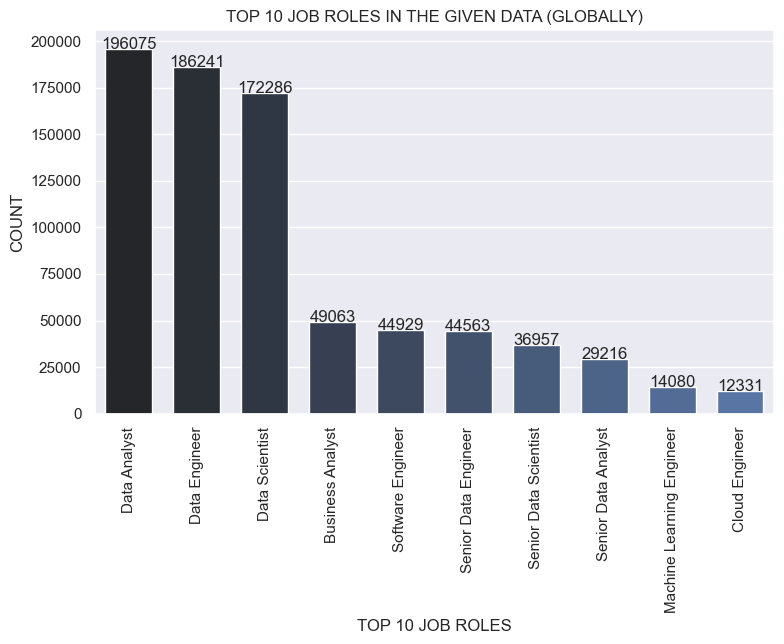

In [180]:
# plotting a graph between the top 10 skills in the given data and their counts
plt.figure(figsize=(14, 8))
sns.barplot(y=top10_roles.index, x=top10_roles.values, palette='dark:g', orient='h', width=0.69)
plt.ylabel("JOB TITLES")
plt.xlabel("COUNT OF JOB POSTINGS")
plt.title("TOP 10 JOB ROLES IN THE GIVEN DATA (GLOBALLY)")
for i, name in enumerate(top10_roles.index):
    plt.annotate(top10_roles.values[i], (top10_roles.values[i], i), ha='left')
plt.tight_layout()
plt.show()


In [181]:
#Finding the top countires for the job postings

In [182]:
top10_countries=df1['job_country'].value_counts().head(10)

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_9744\139231840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10_countries.index, x=top10_countries.values, palette='dark:g', orient='h')


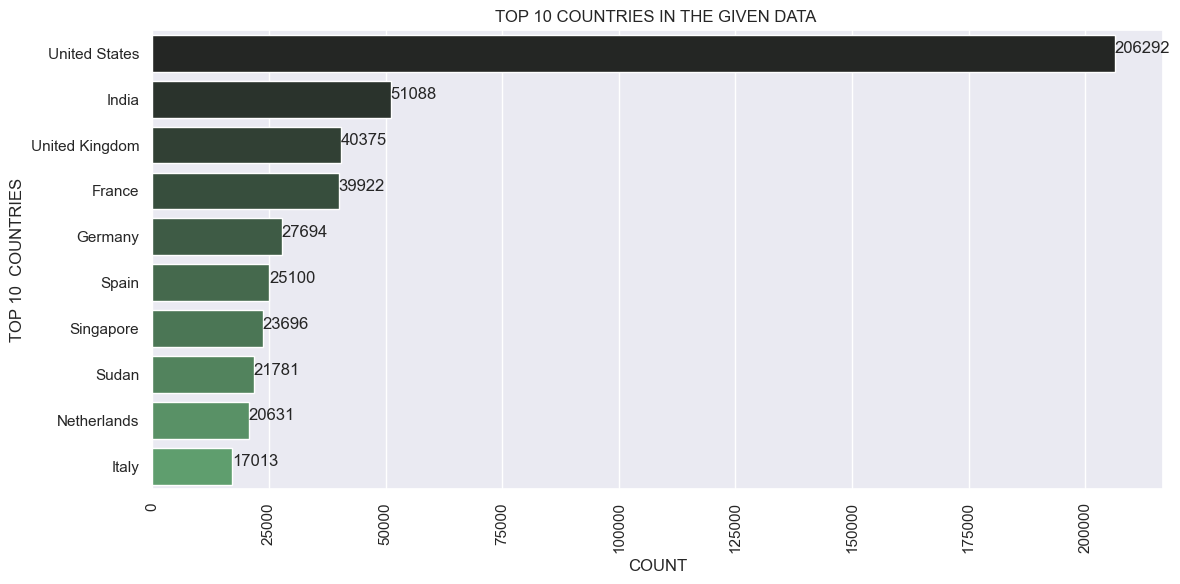

In [183]:
#plotting the graph for the same 
plt.figure(figsize=(12, 6))
sns.barplot(y=top10_countries.index, x=top10_countries.values, palette='dark:g', orient='h')
plt.ylabel("TOP 10  COUNTRIES")
plt.xlabel("COUNT")
plt.title("TOP 10 COUNTRIES IN THE GIVEN DATA ")
plt.xticks(rotation='vertical')
for i, name in enumerate(top10_countries.index):
    plt.annotate(top10_countries.values[i], (top10_countries.values[i], i), ha='left')
    
plt.tight_layout()
plt.show()


In [184]:
# Remote vs in office 

In [185]:
remote_or_office=df1['job_work_from_home'].value_counts()

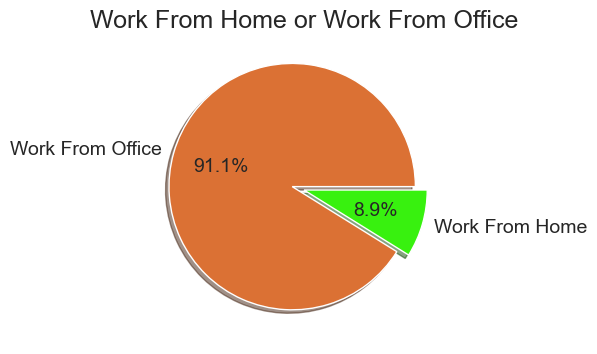

In [186]:
plt.figure(figsize=(4, 4))
plt.title("Work From Home or Work From Office", fontsize=18)
plt.pie(remote_or_office, labels=['Work From Office', 'Work From Home'], colors=["#db7134", "#38f10f"], autopct='%1.1f%%', textprops={'fontsize': 14}, shadow=True, explode=[0.1, 0])
plt.show()

In [187]:
#Lets find the top hiring companies

In [188]:
data_jobs=df1['job_title_short'].value_counts().head(3).index.to_list()

In [189]:
top20_companies=df1[df1['job_title_short'].isin(data_jobs)]['company_name'].value_counts().head(20)

In [190]:
top20_companies

company_name
Emprego                3410
Booz Allen Hamilton    2437
Dice                   2333
Insight Global         1919
Listopro               1693
Robert Half            1605
Harnham                1593
SynergisticIT          1451
Guidehouse             1418
Citi                   1325
Upwork                 1291
Accenture              1285
Deloitte               1267
Michael Page           1261
Confidenziale          1237
Walmart                1178
UnitedHealth Group     1138
IBM                    1129
Capital One            1098
Capgemini              1093
Name: count, dtype: int64

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_9744\1084787830.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_companies.values, y=top20_companies.index, orient='h', palette="dark:r")


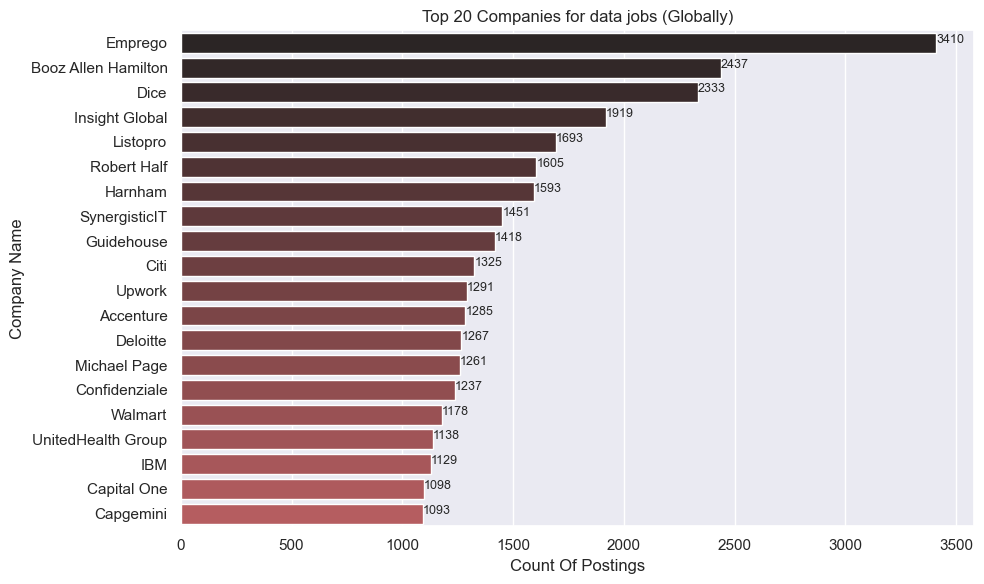

In [191]:
plt.figure(figsize=(10, 6))
sns.set()
sns.barplot(x=top20_companies.values, y=top20_companies.index, orient='h', palette="dark:r")
plt.xlabel('Count Of Postings')
plt.ylabel('Company Name')
plt.title('Top 20 Companies for data jobs (Globally)')
for i, name in enumerate(top20_companies.index):
    plt.annotate(top20_companies.values[i], (top20_companies.values[i], i), ha='left', fontsize=9)

plt.tight_layout()
plt.show()

In [192]:
df_india=df1[df1['job_country']=='India']
top10_roles_india=df_india['job_title_short'].value_counts().head(10)

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_9744\932538822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10_roles_india.index, x=top10_roles_india.values, palette='dark:b', width=0.5, orient='h')


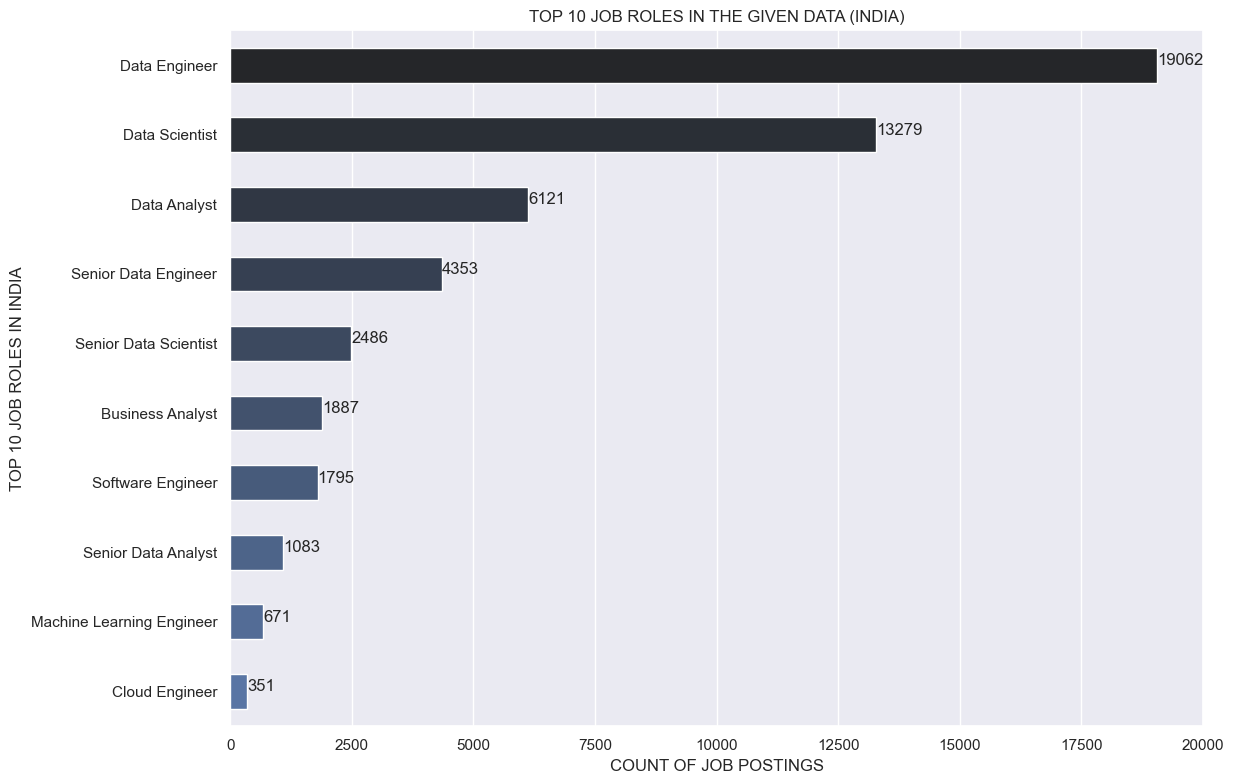

In [193]:
plt.figure(figsize=(12.5, 8))
sns.barplot(y=top10_roles_india.index, x=top10_roles_india.values, palette='dark:b', width=0.5, orient='h')
plt.xlabel("COUNT OF JOB POSTINGS")
plt.ylabel("TOP 10 JOB ROLES IN INDIA")
plt.title("TOP 10 JOB ROLES IN THE GIVEN DATA (INDIA)")
for i, name in enumerate(top10_roles_india.index):
    plt.annotate(top10_roles_india.values[i], (top10_roles_india.values[i], i), ha='left')

plt.tight_layout()
plt.show()

In [194]:
#Finding the top 10 companies in India 
top20_companies_india=df_india['company_name'].value_counts().head(20)

C:\Users\Ujjwal\AppData\Local\Temp\ipykernel_9744\687023175.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_companies_india.values, y=top20_companies_india.index, orient='h', palette="dark:r")


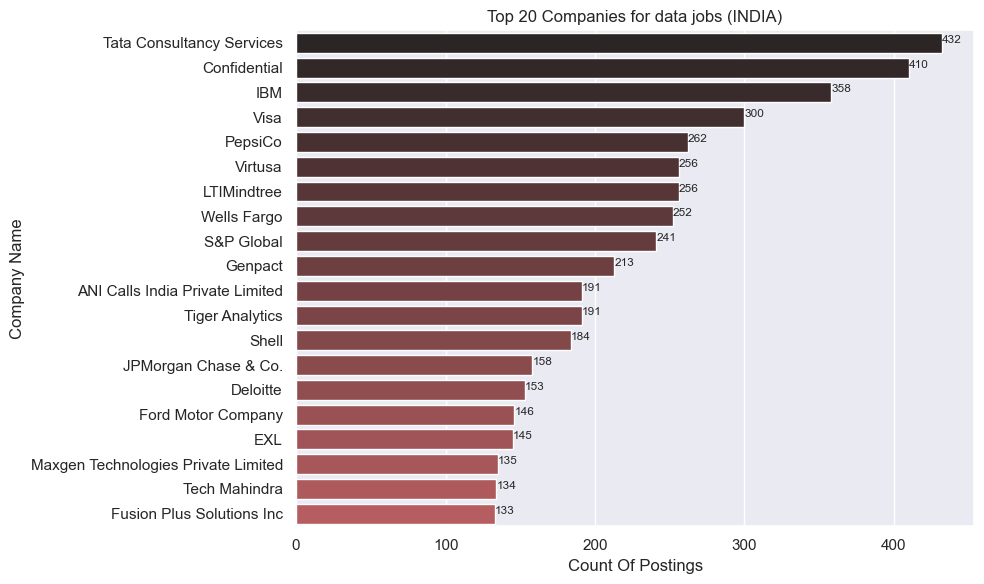

In [195]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top20_companies_india.values, y=top20_companies_india.index, orient='h', palette="dark:r")
plt.xlabel('Count Of Postings')
plt.ylabel('Company Name')
plt.title('Top 20 Companies for data jobs (INDIA)')
for i, name in enumerate(top20_companies_india.index):
    plt.annotate(top20_companies_india.values[i], (top20_companies_india.values[i], i), ha='left', fontsize=8.5)
plt.tight_layout()
plt.show()

In [196]:
#Checking how many jobs have work from home within india 
wfh_india=df_india['job_work_from_home'].value_counts()
wfh_india

job_work_from_home
False    45376
True      5712
Name: count, dtype: int64

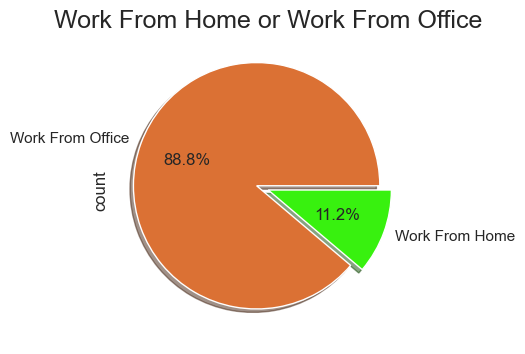

In [197]:
plt.figure(figsize=(4, 4))
plt.title("Work From Home or Work From Office", fontsize=18)
wfh_india.plot(kind='pie', autopct='%1.1f%%', explode=[0.1, 0], shadow=True, colors=["#db7134", "#38f10f"], labels=['Work From Office', 'Work From Home'])
plt.show()